In [2]:

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style="seaborn"
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load DataFrames from CSV
X_train_pca_df = pd.read_csv("X_train_pca.csv")
X_val_pca_df = pd.read_csv("X_val.csv")
X_test_pca_df = pd.read_csv("X_test.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_val = pd.read_csv("Y_val.csv")
Y_test = pd.read_csv("Y_test.csv")

In [5]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca_df, Y_train.values.ravel())
rf_predictions_val = rf_model.predict(X_val_pca_df)
rf_accuracy_val = accuracy_score(Y_val, rf_predictions_val)
print("Random Forest Accuracy On  Val Set :", rf_accuracy_val)




Random Forest Accuracy On  Val Set : 0.9332940483205657


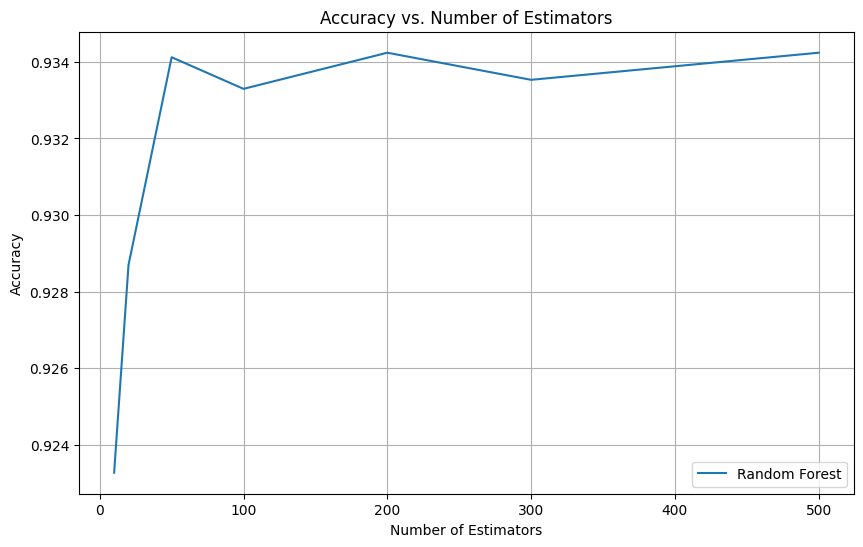

In [3]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define a range of values for n_estimators
n_estimators_values = [10, 20, 50, 100, 200,300,500]

# Lists to store accuracy scores for Random Forest
rf_accuracies = []

# Iterate over each value of n_estimators for Random Forest
for n_estimators in n_estimators_values:
    # Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train_pca_df, Y_train.values.ravel())
    rf_predictions_val = rf_model.predict(X_val_pca_df)
    rf_accuracy_val = accuracy_score(Y_val, rf_predictions_val)
    rf_accuracies.append(rf_accuracy_val)

plt.figure(figsize=(10, 6))

# Random Forest
plt.plot(n_estimators_values, rf_accuracies, label='Random Forest')


plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
#therefore we shall use 200 estimators so that we dont overfit;also dont use lot of resources by picking 500 or more instd of 200;after 200 it overfits

In [5]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_pca_df, Y_train.values.ravel())
rf_predictions = rf_model.predict(X_test_pca_df)
rf_accuracy = accuracy_score(Y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9371906669809097


In [6]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(Y_test, rf_predictions, average='weighted')

# Print F1 score
print("F1 Score:", f1)


F1 Score: 0.9386438478738272


Text(0.5, 1.0, 'Confusion Matrix')

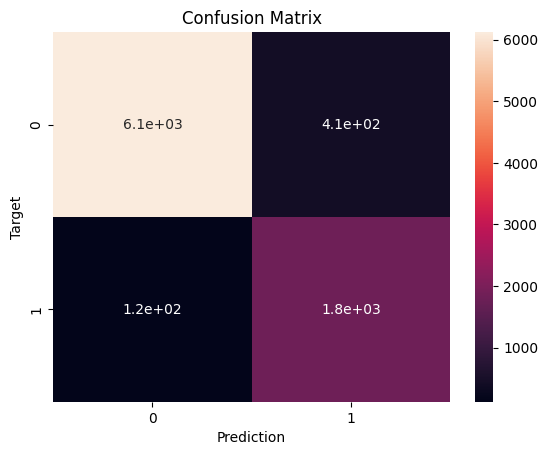

In [7]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test,rf_predictions)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      6533
           1       0.82      0.94      0.87      1953

    accuracy                           0.94      8486
   macro avg       0.90      0.94      0.92      8486
weighted avg       0.94      0.94      0.94      8486



In [9]:
#### Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_pca_df, Y_train.values.ravel())
gb_predictions_val = gb_model.predict(X_val_pca_df)
gb_accuracy_val = accuracy_score(Y_val, gb_predictions_val)
print("Gradient Boosting Accuracy:", gb_accuracy_val)

Gradient Boosting Accuracy: 0.9303476723629935


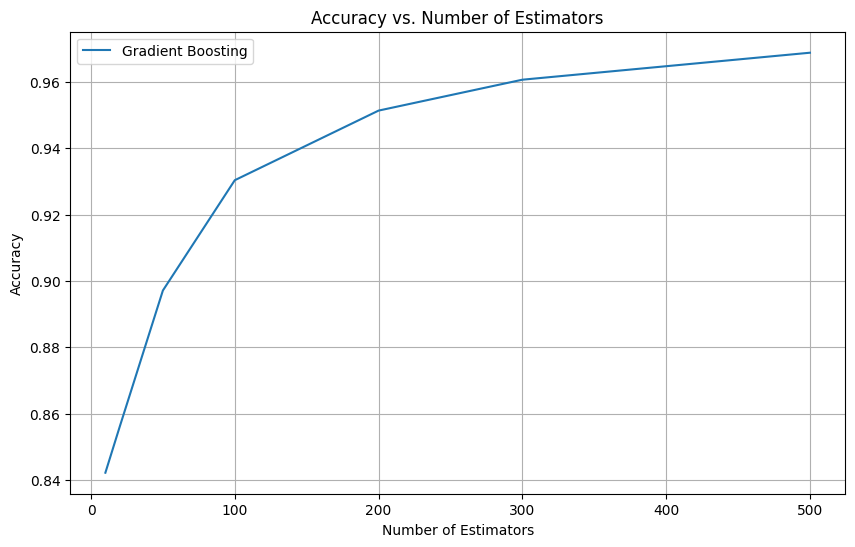

In [10]:
# Lists to store accuracy scores for Gradient Boosting
gb_accuracies = []

# Iterate over each value of n_estimators for Gradient Boosting
# Define a range of values for n_estimators
n_estimators_values = [10, 20, 50, 100, 200,300,500] 

for n_estimators in n_estimators_values:
    # Gradient Boosting model
    gb_model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    gb_model.fit(X_train_pca_df, Y_train.values.ravel())
    gb_predictions_val = gb_model.predict(X_val_pca_df)
    gb_accuracy_val = accuracy_score(Y_val, gb_predictions_val)
    gb_accuracies.append(gb_accuracy_val)
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, gb_accuracies, label='Gradient Boosting')

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
#### Gradient Boosting model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_model = GradientBoostingClassifier(n_estimators=500, random_state=42)
gb_model.fit(X_train_pca_df, Y_train.values.ravel())
gb_predictions = gb_model.predict(X_test_pca_df)
gb_accuracy = accuracy_score(Y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.9123261843035588


In [12]:
#therefore we shall use 500 estimators

In [13]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(Y_test, rf_predictions, average='weighted')

# Print F1 score
print("F1 Score:", f1)


F1 Score: 0.9386438478738272


Text(0.5, 1.0, 'Confusion Matrix')

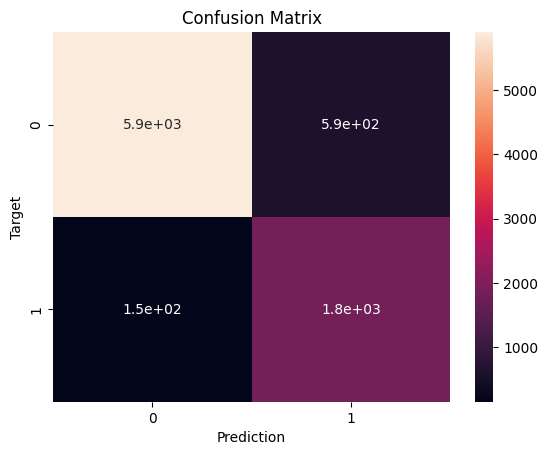

In [5]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test,gb_predictions)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,gb_predictions))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      6498
           1       0.76      0.92      0.83      1988

    accuracy                           0.91      8486
   macro avg       0.87      0.92      0.89      8486
weighted avg       0.92      0.91      0.92      8486

